In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/kaggle/input/property-listing-data-in-bangladesh/property_listing_data_in_Bangladesh.csv')
df.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


# Data Preprocessing

In [3]:
# Clean the 'area', 'beds', and 'bath' columns 
df['area'] = df['area'].str.replace(r'[^\d.]+', '', regex=True)
df['beds'] = df['beds'].str.replace(r'[^\d.]+', '', regex=True)
df['bath'] = df['bath'].str.replace(r'[^\d.]+', '', regex=True)

In [4]:
# drop unnecessary columns
df = df.drop(['title', 'adress', 'purpose', 'flooPlan', 'url', 'lastUpdated'], axis=1)

In [5]:
df.head()

,beds,bath,area,type,price
0,3,4,2200,Apartment,50 Thousand
1,3,4,1400,Apartment,30 Thousand
2,3,4,1950,Apartment,30 Thousand
3,3,3,2000,Apartment,35 Thousand
4,3,4,1650,Apartment,25 Thousand


# Visualization

<Axes: xlabel='type', ylabel='count'>

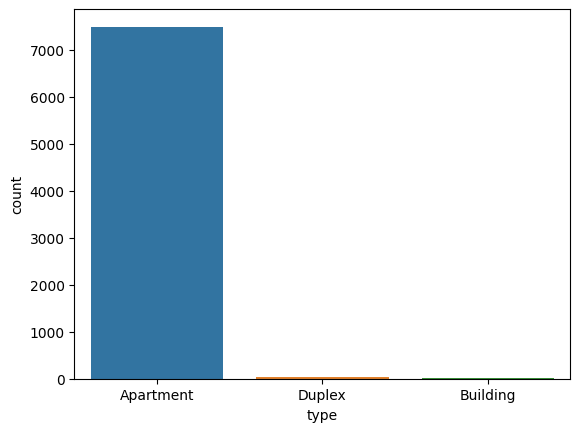

In [6]:
# visualization of 'type'
sns.countplot(x='type', data=df)

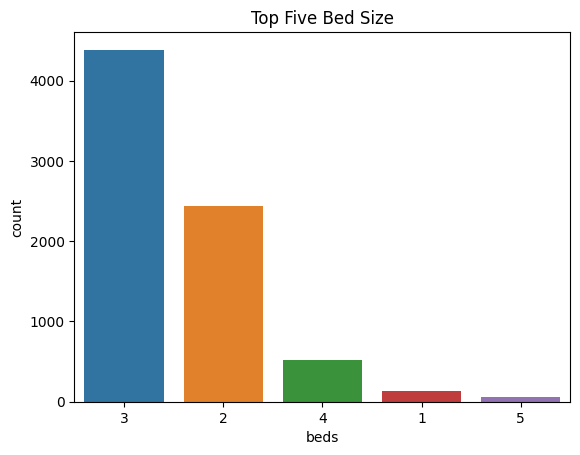

In [17]:
# Visualize Bed Size
top_beds = df['beds'].value_counts().nlargest(5).index
sns.countplot(x='beds', data=df[df['beds'].isin(top_beds)], order=top_beds)
plt.title('Top Five Bed Size')
plt.show()

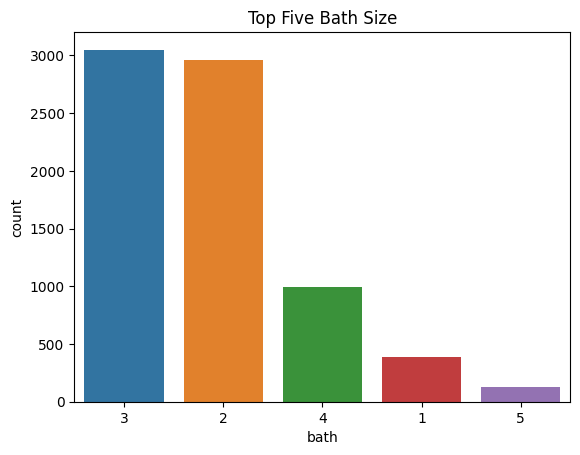

In [16]:
# Visualize Bath Size
top_five_bath = df['bath'].value_counts().nlargest(5).index
sns.countplot(x='bath', data=df[df['bath'].isin(top_five_bath)], order=top_five_bath)
plt.title('Top Five Bath Size')
plt.show()

# 

# Feature Engineering

In [18]:
# convert column price to numeric column

def convert_to_numeric(value):
    if 'Thousand' in value:
        return int(float(value.replace(' Thousand', ''))*1000)
    elif 'Lakh' in value:
        return int(float(value.replace(' Lakh', '')) * 100000)
    else:
        return None

In [19]:
df['price'] = df['price'].apply(convert_to_numeric)

# Label Encoding

In [20]:
df['type'].value_counts()

type
Apartment    7489
Duplex         47
Building       21
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

df.head()

,beds,bath,area,type,price
0,3,4,2200,0,50000
1,3,4,1400,0,30000
2,3,4,1950,0,30000
3,3,3,2000,0,35000
4,3,4,1650,0,25000


# Apply Machine Learning

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [23]:
x = df.drop(['price'], axis=1) # feature
y = df['price'] # target

# train test split
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.33, random_state=42)

**Linear Regression**

In [24]:
# using linear regression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.7807255463457015

In [25]:
# using random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

0.7550351410934413

# After Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [27]:
# linear regression
lr = LinearRegression()
lr.fit(xtrain_scaled, ytrain)
lr.score(xtest_scaled, ytest)

0.7807255463457075

# Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(xtrain_scaled, ytrain)
ridge_r2 = ridge.score(xtest_scaled, ytest)

print(f"R-squared score with Ridge Regression: {ridge_r2:.2f}")

R-squared score with Ridge Regression: 0.78
